In [2]:
import pandas as pd
df = pd.read_csv("../df_check_99.csv", index_col=0)

In [3]:
df.head(3)

,file,country,eval_year,evaluator_group,evaluator,project_cost_plan,project_cost_act,プロジェクト期間開始_計画時,プロジェクト期間終了_計画時,プロジェクト期間開始_実績,...,社会基盤一般_flg_fix,航空・空港_flg_fix,行政一般_flg_fix,観光一般_flg_fix,貿易_flg_fix,農業一般_flg_fix,通信・放送一般_flg_fix,都市計画・土地造成_flg_fix,金融_flg_fix,開発_flg_fix
0,https://www2.jica.go.jp/ja/evaluation/pdf/2010...,ケニア,2010,OPMAC株式会社,小林信行,1.110900e+09,1.019900e+09,2002-01-01,2005-11-20,2002-03-01,...,False,False,False,False,False,False,False,False,False,False
1,https://www2.jica.go.jp/ja/evaluation/pdf/2010...,ベトナム,2010,グローバルリンクマネージメント株式会社,三浦順子,2.235000e+09,2.206000e+09,2002-07-01,2006-01-01,2002-07-01,...,False,False,False,False,False,False,False,False,False,False
2,https://www2.jica.go.jp/ja/evaluation/pdf/2010...,モンゴル,2010,財団法人国際開発高等教育機構,浜岡真紀,NaN,NaN,2002-06-17,2003-06-15,2003-07-01,...,False,False,False,False,False,False,False,False,False,False


In [4]:
for col in df.select_dtypes(include=["object", "string"]).columns:
    df[col] = df[col].str.replace(r"[,\t\r\n]", "", regex=True)

df.to_csv("../df_check_99_rep_col.csv")

In [5]:
len(df['file'].unique())

2227

In [ ]:
drop_rec=[
    # 事後評価ではないものが混ざっているため除外
    'https://www2.jica.go.jp/ja/evaluation/pdf/2023_2360180_4_s.pdf'
]
df = df[~df['file'].isin(drop_rec)]

## 記述統計

In [7]:
df.columns

Index(['file', 'country', 'eval_year', 'evaluator_group', 'evaluator',
       'project_cost_plan', 'project_cost_act', 'プロジェクト期間開始_計画時',
       'プロジェクト期間終了_計画時', 'プロジェクト期間開始_実績', 'プロジェクト期間終了_実績',
       'project_duration_plan', 'project_duration_act', '効率性_コスト', '効率性_期間',
       '総合評価', 'type', '分野', '案件名', '連番', 'region', 'region_detail', 'alpha2',
       'alpha3', 'project_start_year', 'project_end_year', 'join_flg',
       'control_of_corruption', 'government_effectiveness',
       'political_stability', 'regulatory_quality', 'rule_of_law',
       'voice_and_accountability', 'freedom_house_score', 'gdp_growth', 'Year',
       'population', 'external_eval_flg', 'total_eval',
       'evaluator_avg_other_pjt', 'その他_flg_fix', 'インフラ_flg_fix',
       'エネルギー一般_flg_fix', '人材・教育_flg_fix', '保健・社会福祉_flg_fix', '公益事業一般_flg_fix',
       '商業経営_flg_fix', '工業_flg_fix', '放送_flg_fix', '林業・森林保全_flg_fix',
       '水産_flg_fix', '水資源開発_flg_fix', '海運_flg_fix', '測量・地図_flg_fix',
       '災害・食料援助_flg_fix', '災害対

In [8]:
import pandas as pd

# 集計したいカラムのリスト
cols_to_agg = [
    'project_cost_plan',
    'project_cost_act',
    'project_duration_plan',
    'project_duration_act',
    'total_eval'
]

million_col = [
    'project_cost_plan',
    'project_cost_act',
]

for c in million_col:
    df[c] = df[c]/1000000


# 結果を格納するリスト
summary_list = []

# カラムごとに集計
for col in cols_to_agg:
    tmp = (
        df.groupby('type')[col]
          .agg(サンプルサイズ='count',
               平均値='mean',
               標準偏差='std',
               最小値='min',
               最大値='max')
          .reset_index()
    )
    tmp.insert(0, '項目名', col)  # 項目名列を追加
    summary_list.append(tmp)

# 全部まとめて1つのDataFrameに
summary_df = pd.concat(summary_list, ignore_index=True)

# 表の見た目を整える
summary_df = summary_df[['項目名', 'type', 'サンプルサイズ', '平均値', '標準偏差', '最小値', '最大値']]

summary_df.sort_values(['項目名','type'])

,項目名,type,サンプルサイズ,平均値,標準偏差,最小値,最大値
4,project_cost_act,技協,978,578.237186,2340.433410,179.000000,71485.0
5,project_cost_act,有償,526,24565.411489,38517.787338,274.000000,382185.0
6,project_cost_act,無償,686,1414.792972,1416.798497,158.000000,19773.0
7,project_cost_act,複合,14,40519.000000,72936.995605,910.000000,273554.0
0,project_cost_plan,技協,964,476.142977,1189.110458,40.000000,34594.0
1,project_cost_plan,有償,528,24981.405679,38336.821919,2010.000000,343641.0
2,project_cost_plan,無償,691,1523.835434,1476.150274,222.000000,20334.0
3,project_cost_plan,複合,14,27151.170194,36609.301056,786.382716,108211.0
12,project_duration_act,技協,981,50.554536,19.584676,12.000000,239.0
13,project_duration_act,有償,522,114.266284,58.654949,1.000000,528.0


In [9]:
import japanize_matplotlib

## 地域・時間別分析

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, product

# --------- Column inference (unchanged) ---------
def _infer_col(df: pd.DataFrame, candidates):
    cols = set(df.columns)
    for c in candidates:
        if c in cols:
            return c
    lower = {c.lower(): c for c in df.columns}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

def infer_core_columns(df: pd.DataFrame):
    eval_col = _infer_col(df, ['total_eval'])
    region_col = _infer_col(df, ['region_detail'])
    time_col = _infer_col(df, ['eval_year'])
    return eval_col, region_col, time_col

# --------- Region summary (unchanged) ---------
def make_region_summary(df: pd.DataFrame,
                        eval_col: str,
                        region_col: str,
                        min_n: int = 5):
    sub = df[[eval_col, region_col]].dropna().copy()
    sub[region_col] = sub[region_col].astype(str)

    g = sub.groupby(region_col)[eval_col]
    n = g.size().rename('n')
    mean = g.mean().rename('mean')
    std = g.std(ddof=1).rename('std')
    se = (std / np.sqrt(n)).rename('se')
    ci95_half = (1.96 * se).rename('ci95_half')

    out = pd.concat([n, mean, std, se, ci95_half], axis=1).reset_index()
    out_report = out[out['n'] >= min_n].copy()
    out_report['ci95_low'] = out_report['mean'] - out_report['ci95_half']
    out_report['ci95_high'] = out_report['mean'] + out_report['ci95_half']
    out_report['rank_mean_desc'] = out_report['mean'].rank(ascending=False, method='min').astype(int)
    out_report = out_report.sort_values(['mean', 'n'], ascending=[False, False]).reset_index(drop=True)
    return out_report

# --------- Bar plot (白黒＋サンプル数表示) ---------
import numpy as np
import matplotlib.pyplot as plt

def plot_region_means_with_ci_bw(summary_df, region_col='region'):
    if summary_df.empty:
        print("No regions meet the min_n threshold; nothing to plot.")
        return

    x = np.arange(len(summary_df))
    means = summary_df['mean'].to_numpy()
    ci = summary_df['ci95_half'].to_numpy()
    labels = summary_df[region_col].astype(str).tolist()
    counts = summary_df['n'].to_numpy()  # サンプル数

    fig, ax = plt.subplots(figsize=(max(6, len(labels) * 0.6), 5))
    bars = ax.bar(
        x, means, yerr=ci,
        capsize=4, color='white', edgecolor='black', linewidth=1.0
    )

    # --- サンプル数を各バーの上に表示 ---
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.02,
            f"n={counts[i]}", ha='center', va='bottom', fontsize=8
        )

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('総合評価平均')
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.6)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()


# --------- B/W Plot: trends (linestyle × marker) ---------
def plot_region_trends_bw(df: pd.DataFrame,
                          eval_col: str,
                          region_col: str,
                          time_col: str,
                          min_n_per_point: int = 5,
                          show_counts: bool = True):
    """
    地域別の年次トレンド（白黒印刷対応）。
    線種（-, --, -., :）×マーカー（o, s, ^, D, v, P, X, h, *）で識別。
    """
    sub = df[[eval_col, region_col, time_col]].dropna().copy()
    sub[time_col] = sub[time_col].astype(int)
    sub[region_col] = sub[region_col].astype(str)

    grp = sub.groupby([region_col, time_col])[eval_col]
    trend = grp.agg(count=('count'), mean=('mean')).reset_index()
    trend = trend[trend['count'] >= min_n_per_point]

    if trend.empty:
        print("No region-year cells meet the min_n threshold; skipping trend plot.")
        return

    years = sorted(trend[time_col].unique().tolist())
    regions = trend[region_col].unique().tolist()

    # スタイルの組み合わせを用意（必要数だけ循環）
    linestyles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D', 'v', 'P', 'X', 'h', '*']
    style_cycler = cycle(product(linestyles, markers))

    fig, ax = plt.subplots(figsize=(max(6, len(years) * 0.8), 5 + len(regions) * 0.1))

    handles = []
    for r in regions:
        ls, mk = next(style_cycler)
        tr = trend[trend[region_col] == r].sort_values(time_col)
        # 白黒：線は黒、マーカーは白抜き＋黒縁
        line, = ax.plot(tr[time_col], tr['mean'],
                        linestyle=ls, color='black', linewidth=1.4,
                        marker=mk, markersize=5,
                        markerfacecolor='white', markeredgecolor='black',
                        label=str(r))
        handles.append(line)

        if show_counts:
            y_range = (tr['mean'].max() - tr['mean'].min()) if tr['mean'].max() != tr['mean'].min() else 1.0
            dy = 0.03 * y_range
            for xi, yi, ni in zip(tr[time_col], tr['mean'], tr['count']):
                ax.text(xi, yi + dy, f"n={int(ni)}", ha='center', va='bottom', fontsize=8)

    ax.set_xlabel('Year')
    ax.set_ylabel('Mean of total_eval')
    ax.set_title('Region-wise evaluation Trend (monochrome, cells with sufficient N)')
    ax.grid(linestyle='--', linewidth=0.6, alpha=0.6)
    ax.set_axisbelow(True)
    ax.legend(handles=handles, loc='best', frameon=False, ncols=2, fontsize=9)
    plt.tight_layout()
    plt.show()

# --------- Orchestrator (updated to use B/W plots) ---------
def run_region_analysis(df: pd.DataFrame, min_n: int = 5, min_n_per_point: int = 5):
    eval_col, region_col, time_col = infer_core_columns(df)
    if eval_col is None or region_col is None:
        print("Could not infer column names. Please specify explicitly.")
        return

    summary = make_region_summary(df, eval_col, region_col, min_n=min_n)
    summary = summary.rename(columns={region_col: 'region'})
    print(summary)

    # 白黒対応の棒グラフ
    plot_region_means_with_ci_bw(summary, region_col='region')

    # 白黒対応のトレンド
    if time_col is not None:
        plot_region_trends_bw(df, eval_col=eval_col, region_col=region_col, time_col=time_col,
                              min_n_per_point=min_n_per_point, show_counts=True)

    region    n      mean       std        se  ci95_half  ci95_low  ci95_high  \
0     東アジア  177  3.548023  0.629943  0.047349   0.092805  3.455218   3.640827   
1      北中米   12  3.416667  0.900337  0.259905   0.509413  2.907253   3.926080   
2     南アジア  311  3.202572  0.791564  0.044885   0.087976  3.114597   3.290548   
3    北アフリカ   86  3.104651  0.812101  0.087571   0.171639  2.933012   3.276290   
4    東南アジア  606  3.100660  0.805826  0.032734   0.064159  3.036501   3.164820   
5    ポリネシア   20  3.100000  0.852242  0.190567   0.373511  2.726489   3.473511   
6       東欧   14  3.071429  0.730046  0.195113   0.382421  2.689007   3.453850   
7   ミクロネシア   22  3.045455  0.950051  0.202552   0.397001  2.648453   3.442456   
8    中央アジア   46  3.021739  0.856067  0.126220   0.247391  2.774348   3.269131   
9   中央アメリカ   79  2.987342  0.926721  0.104264   0.204358  2.782984   3.191700   
10  南ヨーロッパ   34  2.970588  0.904041  0.155042   0.303882  2.666706   3.274470   
11    西アジア   74  2.932432  0

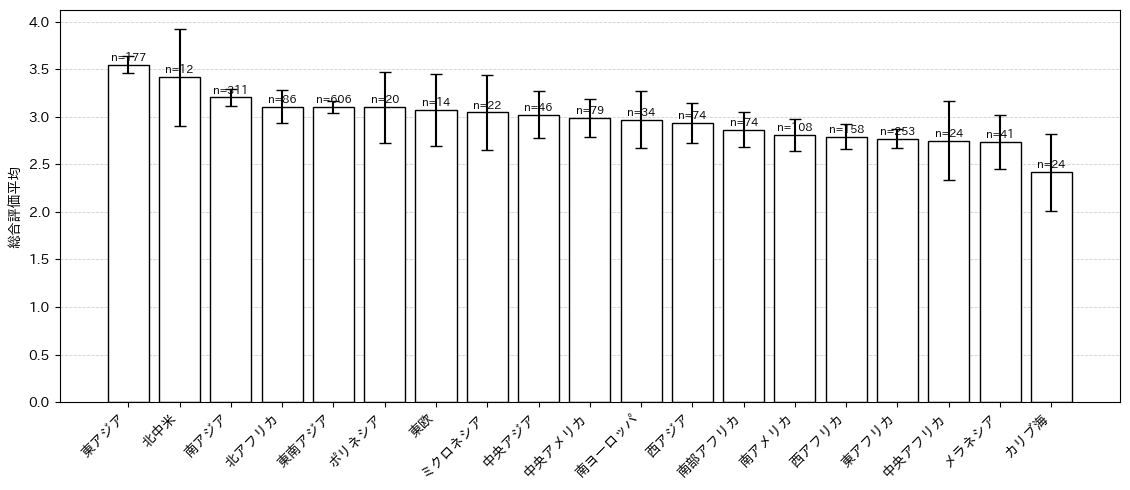

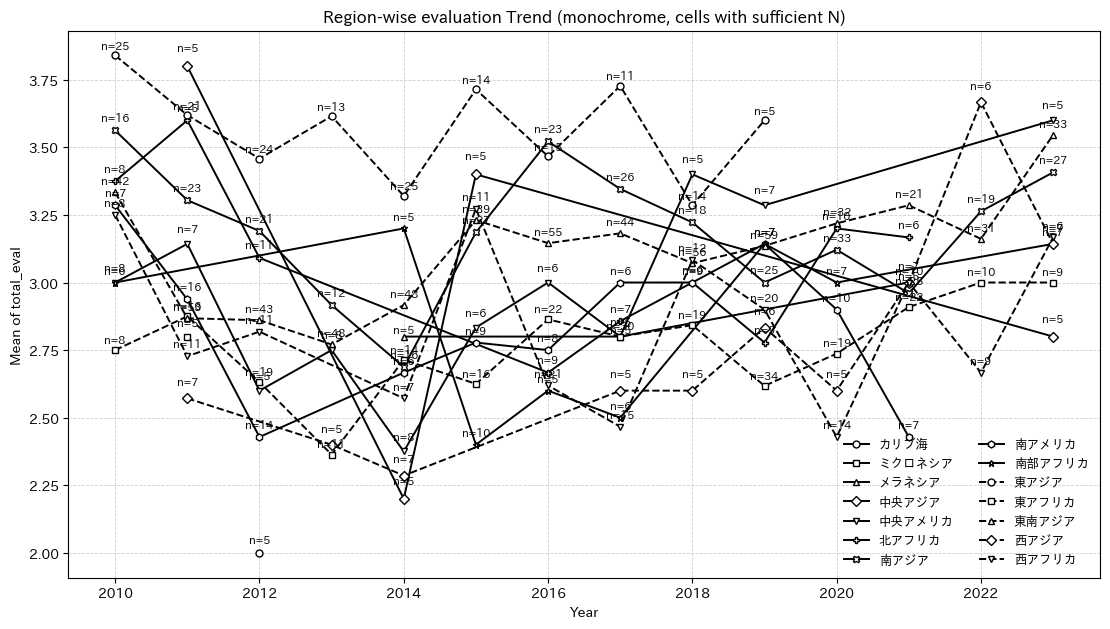

In [11]:
run_region_analysis(df)

## セクター別分析

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sector_eval_summary_bw(df, eval_col='total_eval', flag_suffix='_flg_fix', min_n=5):
    """
    セクター別に評価平均・95%CI・件数を集計し、
    白黒印刷対応の棒グラフ（白塗り＋黒枠）で表示する。
    """
    # 1. 対象セクターフラグ列
    sector_cols = [c for c in df.columns if c.endswith(flag_suffix)]
    if not sector_cols:
        raise ValueError(f"No sector columns ending with '{flag_suffix}' found.")
    
    # 2. 縦持ち化
    records = []
    for _, row in df.iterrows():
        for col in sector_cols:
            if row[col] == True:
                records.append({
                    'sector': col.replace(flag_suffix, ''),
                    eval_col: row[eval_col]
                })
    long_df = pd.DataFrame(records)

    # 3. 集計
    g = long_df.groupby('sector')[eval_col]
    n = g.size().rename('n')
    mean = g.mean().rename('mean')
    std = g.std(ddof=1).rename('std')
    se = (std / np.sqrt(n)).rename('se')
    ci95 = (1.96 * se).rename('ci95_half')

    summary = pd.concat([n, mean, std, se, ci95], axis=1).reset_index()
    summary['ci95_low'] = summary['mean'] - summary['ci95_half']
    summary['ci95_high'] = summary['mean'] + summary['ci95_half']

    summary = summary[summary['n'] >= min_n]
    summary = summary.sort_values('mean', ascending=False).reset_index(drop=True)

    # 4. 白黒グラフ
    x = np.arange(len(summary))
    fig, ax = plt.subplots(figsize=(max(6, len(summary) * 0.6), 5))
    bars = ax.bar(
        x, summary['mean'], yerr=summary['ci95_half'], capsize=4,
        color='white', edgecolor='black', linewidth=1.0, ecolor='black'
    )

    # 件数ラベル
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
                f"n={summary.loc[i, 'n']}", ha='center', va='bottom', fontsize=8)

    ax.set_xticks(x)
    ax.set_xticklabels(summary['sector'], rotation=45, ha='right')
    ax.set_ylabel(f"総合評価平均")
    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.6)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

    return summary

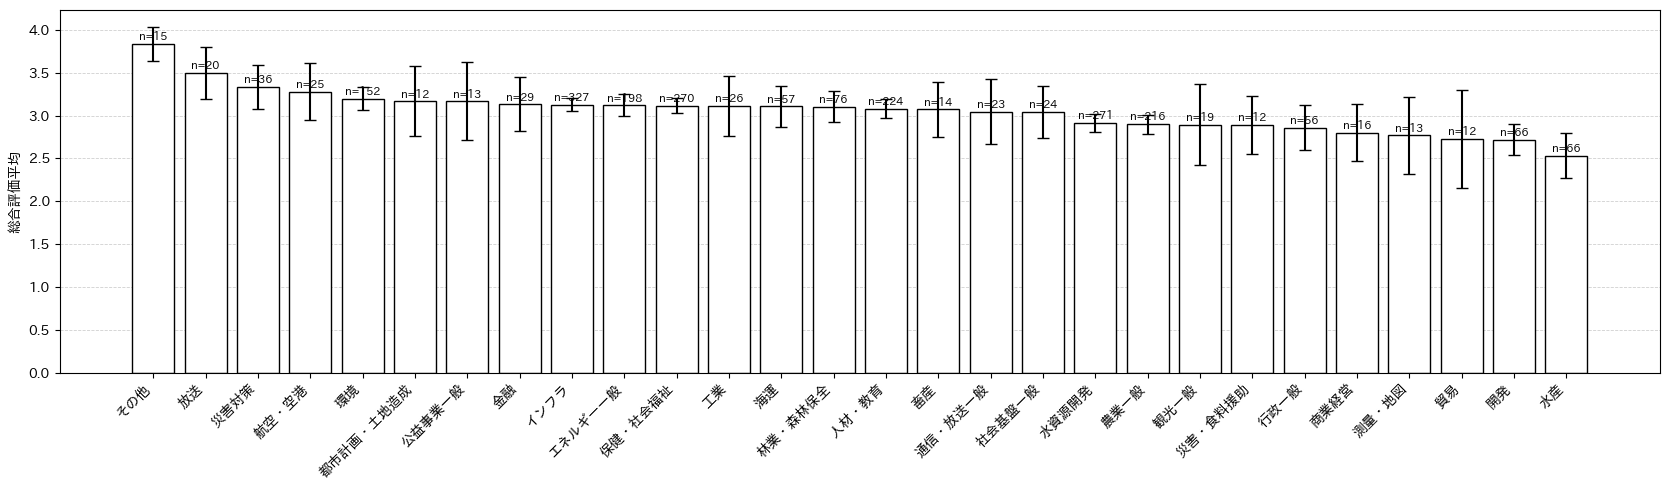

,sector,n,mean,std,se,ci95_half,ci95_low,ci95_high
0,その他,15,3.833333,0.389249,0.100504,0.196987,3.636346,4.030321
1,放送,20,3.500000,0.688247,0.153897,0.301638,3.198362,3.801638
2,災害対策,36,3.333333,0.792825,0.132137,0.258989,3.074344,3.592323
3,航空・空港,25,3.280000,0.842615,0.168523,0.330305,2.949695,3.610305
4,環境,152,3.195946,0.846431,0.068655,0.134563,3.061383,3.330509
5,都市計画・土地造成,12,3.166667,0.717741,0.207194,0.406100,2.760567,3.572767
6,公益事業一般,13,3.166667,0.834847,0.231545,0.453828,2.712839,3.620495
7,金融,29,3.130435,0.868873,0.161346,0.316238,2.814197,3.446672
8,インフラ,327,3.128440,0.736026,0.040702,0.079777,3.048664,3.208217
9,エネルギー一般,198,3.120419,0.900965,0.064029,0.125497,2.994922,3.245915


In [13]:
sector_summary = sector_eval_summary_bw(df, eval_col='total_eval', flag_suffix='_flg_fix', min_n=5)
sector_summary

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_sector_trends(df: pd.DataFrame,
                       eval_col: str = 'total_eval',
                       flag_suffix: str = '_flg_fix',
                       time_col: str = 'eval_year',
                       min_n_per_point: int = 5,
                       show_counts: bool = True):
    """
    セクター別（_flg_fix列）ごとの年次推移（平均 total_eval）を描画。
    各ポイントに n を注記（show_counts=True のとき）。
    """
    # 1. セクターフラグ列抽出
    sector_cols = [c for c in df.columns if c.endswith(flag_suffix)]
    if not sector_cols:
        raise ValueError(f"No sector columns ending with '{flag_suffix}' found.")

    # 2. 縦持ち化（複数セクター所属も展開）
    records = []
    for _, row in df.iterrows():
        for col in sector_cols:
            if row[col] is True or row[col] == 1:
                records.append({
                    'sector': col.replace(flag_suffix, ''),
                    eval_col: row[eval_col],
                    time_col: row[time_col]
                })
    long_df = pd.DataFrame(records).dropna(subset=[eval_col, time_col])

    # 3. 年をint化
    # 4. 集計
    grp = long_df.groupby(['sector', time_col])[eval_col]
    trend = grp.agg(count=('count'), mean=('mean')).reset_index()
    trend = trend[trend['count'] >= min_n_per_point]

    if trend.empty:
        print("No sector-year cells meet the min_n threshold; skipping trend plot.")
        return

    years = sorted(trend[time_col].unique().tolist())
    sectors = trend['sector'].unique().tolist()

    # 5. 描画
    fig, ax = plt.subplots(figsize=(max(6, len(years) * 0.8), 5 + len(sectors) * 0.1))
    for s in sectors:
        tr = trend[trend['sector'] == s]
        if tr.empty:
            continue
        ax.plot(tr[time_col], tr['mean'], marker='o', label=str(s))
        if show_counts:
            y = tr['mean'].to_numpy()
            x = tr[time_col].to_numpy()
            n = tr['count'].to_numpy()
            y_range = (np.nanmax(y) - np.nanmin(y)) if np.nanmax(y) != np.nanmin(y) else 1.0
            dy = 0.02 * y_range
            for xi, yi, ni in zip(x, y, n):
                ax.text(xi, yi + dy, f"n={int(ni)}", ha='center', va='bottom', fontsize=8)

    ax.set_xlabel('Year')
    ax.set_ylabel(f"Mean of {eval_col}")
    ax.set_title(f"Sector-wise {eval_col} Trend (with sample sizes)")
    ax.legend(loc='best', fontsize=8)
    plt.tight_layout()
    plt.show()

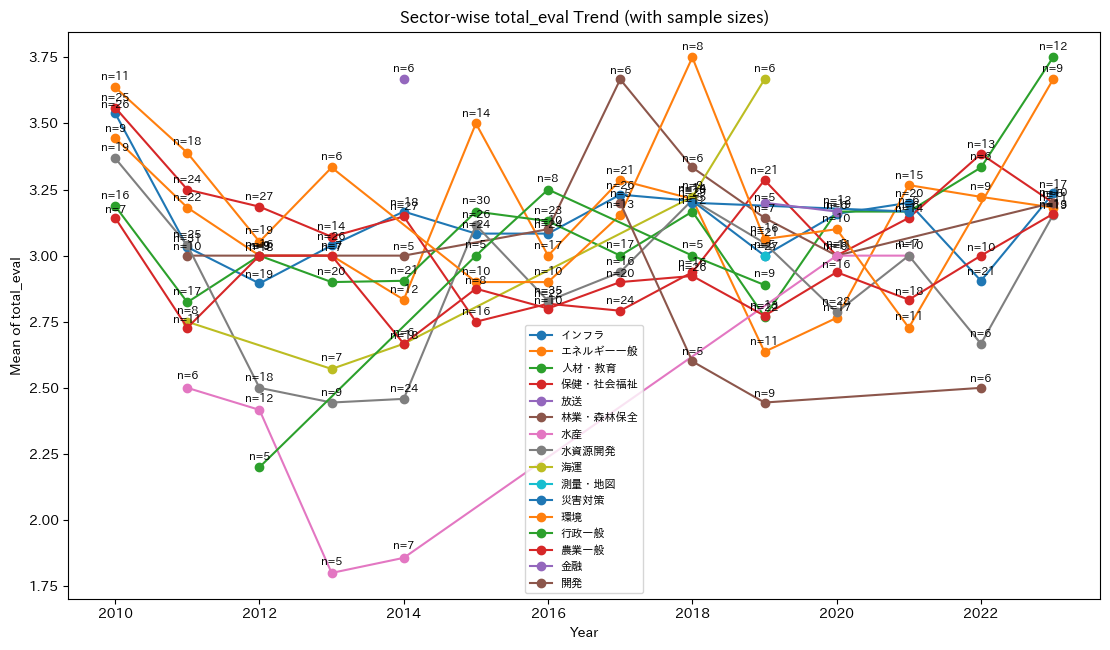

In [15]:
plot_sector_trends(df,
                   eval_col='total_eval',
                   flag_suffix='_flg_fix',
                   time_col='eval_year',
                   min_n_per_point=5,
                   show_counts=True)

## プロジェクト形態での分析

In [16]:
def aid_type_summary(df, eval_col='total_eval', type_col='援助形態', min_n=5):
    sub = df[[eval_col, type_col]].dropna()
    sub[type_col] = sub[type_col].astype(str)
    g = sub.groupby(type_col)[eval_col]
    n = g.size().rename('n')
    mean = g.mean().rename('mean')
    std = g.std(ddof=1).rename('std')
    se = (std / np.sqrt(n)).rename('se')
    ci95_half = (1.96 * se).rename('ci95_half')
    summary = pd.concat([n, mean, std, se, ci95_half], axis=1).reset_index()
    summary = summary[summary['n'] >= min_n].sort_values('mean', ascending=False)

    # プロット
    x = np.arange(len(summary))
    fig, ax = plt.subplots(figsize=(max(6, len(summary) * 0.6), 5))
    bars = ax.bar(x, summary['mean'], yerr=summary['ci95_half'], capsize=4)
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f"n={summary.iloc[i]['n']}", ha='center', va='bottom', fontsize=8)
    ax.set_xticks(x)
    ax.set_xticklabels(summary[type_col], rotation=45, ha='right')
    ax.set_ylabel(f"Mean {eval_col}")
    ax.set_title(f"Aid type-wise Mean {eval_col} (with 95% CI)")
    plt.tight_layout()
    plt.show()

    return summary

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

def aid_type_trends_bw(df, eval_col='total_eval', type_col='援助形態', time_col='eval_year',
                       min_n_per_point=5, show_counts=True):
    """
    援助形態ごとの年次トレンドを白黒印刷対応で描画。
    線種のみで各援助形態を区別。
    """
    sub = df[[eval_col, type_col, time_col]].dropna().copy()
    sub[time_col] = sub[time_col].astype(int)
    sub[type_col] = sub[type_col].astype(str)

    g = sub.groupby([type_col, time_col])[eval_col]
    trend = g.agg(count=('count'), mean=('mean')).reset_index()
    trend = trend[trend['count'] >= min_n_per_point]

    if trend.empty:
        print("No aid-type/year cells meet the threshold; nothing to plot.")
        return

    years = sorted(trend[time_col].unique().tolist())
    aid_types = trend[type_col].unique().tolist()

    linestyles = cycle(['-', '--', '-.', ':'])  # モノクロ線種

    fig, ax = plt.subplots(figsize=(max(6, len(years) * 0.8), 5 + len(aid_types) * 0.1))

    handles = []
    for t in aid_types:
        ls = next(linestyles)
        tr = trend[trend[type_col] == t].sort_values(time_col)
        line, = ax.plot(tr[time_col], tr['mean'],
                        linestyle=ls, color='black', linewidth=1.4,
                        label=str(t))
        handles.append(line)

        if show_counts:
            y_range = tr['mean'].max() - tr['mean'].min() if tr['mean'].max() != tr['mean'].min() else 1.0
            dy = 0.03 * y_range
            for xi, yi, ni in zip(tr[time_col], tr['mean'], tr['count']):
                ax.text(xi, yi + dy, f"n={int(ni)}", ha='center', va='bottom', fontsize=8)

    ax.set_xlabel('評価年度')
    ax.set_ylabel(f"総合評価平均")
    ax.grid(linestyle='--', linewidth=0.6, alpha=0.6)
    ax.set_axisbelow(True)
    ax.legend(handles=handles, loc='best', frameon=False, fontsize=9)
    plt.tight_layout()
    plt.show()

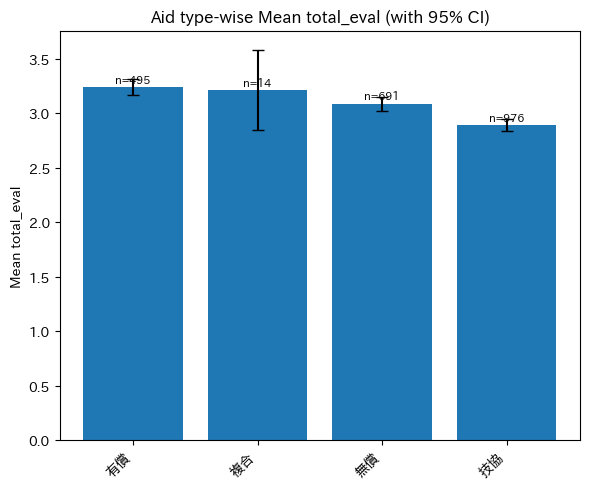

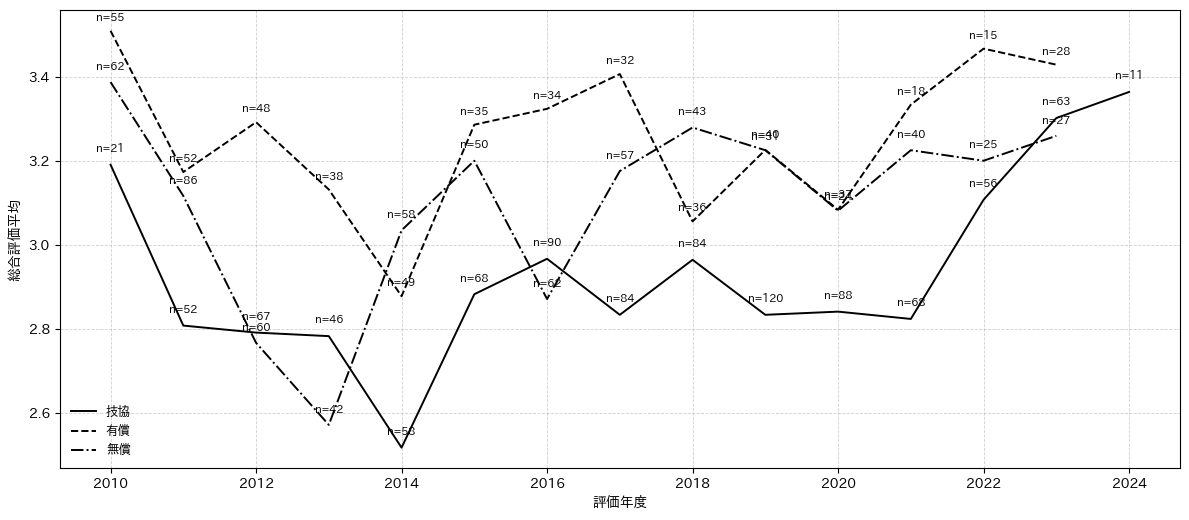

In [18]:
aid_type_summary(df, eval_col='total_eval', type_col='type')
aid_type_trends_bw(df, eval_col='total_eval', type_col='type', time_col='eval_year')

## 地域・セクター別ヒートマップ(単純平均)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 既存のヘルパ関数 flags_to_long_category はそのまま利用することを想定しています。
# from some_module import flags_to_long_category

def flags_to_long_category(df, flag_suffix="_flg_fix", new_col="sector"):
    """
    *_flg_fix の True/1 列を縦持ちカテゴリに展開。
    返り値: long_df（各行は1プロジェクト×1セクター）
    """
    sector_cols = [c for c in df.columns if c.endswith(flag_suffix)]
    recs = []
    for idx, row in df.iterrows():
        for c in sector_cols:
            v = row[c]
            if v is True or (isinstance(v, (int, float)) and v == 1):
                recs.append({**row.to_dict(), new_col: c.replace(flag_suffix, "")})
    return pd.DataFrame(recs)

def plot_region_sector_heatmap(df, eval_col="total_eval", region_col="region_detail",
                               sector_flag_suffix="_flg_fix",
                               min_n=10, show_counts=True,
                               vmin=None, vmax=None):
    """地域 × セクターの単純平均値ヒートマップを作成"""
    # データ準備
    df_long = flags_to_long_category(df, flag_suffix=sector_flag_suffix, new_col="sector")
    df_long = df_long[[eval_col, region_col, "sector"]].dropna()

    # グループごとの平均値とデータ数を計算
    agg_df = (df_long.groupby([region_col, "sector"])[eval_col]
                   .agg(['mean', 'size'])
                   .rename(columns={'mean': 'mean_val', 'size': 'n'})
                   .reset_index())

    # データ数が min_n 未満のセルの平均値を NaN にする
    agg_df.loc[agg_df['n'] < min_n, 'mean_val'] = np.nan

    # ヒートマップ描画のためのピボットテーブルを作成
    piv_m = agg_df.pivot(index=region_col, columns="sector", values="mean_val")
    piv_n = agg_df.pivot(index=region_col, columns="sector", values="n")

    # 描画
    fig, ax = plt.subplots(figsize=(max(8, piv_m.shape[1]*0.7), max(5, piv_m.shape[0]*0.5)))
    arr = piv_m.values.astype(float)
    im = ax.imshow(arr, aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_xticks(range(piv_m.shape[1])); ax.set_xticklabels(list(piv_m.columns), rotation=45, ha='right')
    ax.set_yticks(range(piv_m.shape[0])); ax.set_yticklabels(list(piv_m.index))
    ax.set_title(f"Mean {eval_col} by Region × Sector\n(cells with n < {min_n} masked)")
    fig.colorbar(im, ax=ax, shrink=0.85)

    if show_counts:
        for i in range(piv_m.shape[0]):
            for j in range(piv_m.shape[1]):
                if not np.isnan(arr[i, j]):
                    ax.text(j, i, f"n={int(piv_n.iloc[i, j])}", ha='center', va='center', fontsize=7)

    plt.tight_layout(); plt.show()
    return agg_df

def plot_aidtype_sector_heatmap(df, eval_col="total_eval", aid_col="type",
                                sector_flag_suffix="_flg_fix",
                                min_n=10, show_counts=True,
                                vmin=None, vmax=None):
    """援助タイプ × セクターの単純平均値ヒートマップを作成"""
    # データ準備
    long_df = flags_to_long_category(df, flag_suffix=sector_flag_suffix, new_col="sector")
    keep = [eval_col, aid_col, "sector"]
    long_df = long_df[[c for c in keep if c in long_df.columns]].dropna()

    # グループごとの平均値とデータ数を計算
    agg_df = (long_df.groupby([aid_col, "sector"])[eval_col]
                     .agg(['mean', 'size'])
                     .rename(columns={'mean': 'mean_val', 'size': 'n'})
                     .reset_index())
    
    # データ数が min_n 未満のセルの平均値を NaN にする
    agg_df.loc[agg_df['n'] < min_n, 'mean_val'] = np.nan
    
    # ピボットテーブル作成
    piv_m = agg_df.pivot(index=aid_col, columns="sector", values="mean_val")
    piv_n = agg_df.pivot(index=aid_col, columns="sector", values="n")

    # 描画
    fig, ax = plt.subplots(figsize=(max(8, piv_m.shape[1]*0.7), max(5, piv_m.shape[0]*0.5)))
    arr = piv_m.values.astype(float)
    im = ax.imshow(arr, aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_xticks(range(piv_m.shape[1])); ax.set_xticklabels(list(piv_m.columns), rotation=45, ha='right')
    ax.set_yticks(range(piv_m.shape[0])); ax.set_yticklabels(list(piv_m.index))
    ax.set_title(f"Mean {eval_col} by Aid Type × Sector\n(cells with n < {min_n} masked)")
    fig.colorbar(im, ax=ax, shrink=0.85)

    if show_counts:
        for i in range(piv_m.shape[0]):
            for j in range(piv_m.shape[1]):
                if not np.isnan(arr[i, j]):
                    ax.text(j, i, f"n={int(piv_n.iloc[i, j])}", ha='center', va='center', fontsize=7)

    plt.tight_layout(); plt.show()
    return agg_df

def plot_aidtype_region_heatmap(df, eval_col="total_eval", aid_col="type",
                                region_col="region_detail",
                                min_n=10, show_counts=True,
                                vmin=None, vmax=None):
    """援助タイプ × 地域の単純平均値ヒートマップを作成"""
    # データ準備
    keep = [eval_col, aid_col, region_col]
    d = df[[c for c in keep if c in df.columns]].dropna()

    # グループごとの平均値とデータ数を計算
    agg_df = (d.groupby([aid_col, region_col])[eval_col]
               .agg(['mean', 'size'])
               .rename(columns={'mean': 'mean_val', 'size': 'n'})
               .reset_index())

    # データ数が min_n 未満のセルの平均値を NaN にする
    agg_df.loc[agg_df['n'] < min_n, 'mean_val'] = np.nan

    # ピボットテーブル作成
    piv_m = agg_df.pivot(index=aid_col, columns=region_col, values="mean_val")
    piv_n = agg_df.pivot(index=aid_col, columns=region_col, values="n")

    # 描画
    fig, ax = plt.subplots(figsize=(max(8, piv_m.shape[1]*0.7), max(5, piv_m.shape[0]*0.5)))
    arr = piv_m.values.astype(float)
    im = ax.imshow(arr, aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_xticks(range(piv_m.shape[1])); ax.set_xticklabels(list(piv_m.columns), rotation=45, ha='right')
    ax.set_yticks(range(piv_m.shape[0])); ax.set_yticklabels(list(piv_m.index))
    ax.set_title(f"Mean {eval_col} by Aid Type × Region\n(cells with n < {min_n} masked)")
    fig.colorbar(im, ax=ax, shrink=0.85)

    if show_counts:
        for i in range(piv_m.shape[0]):
            for j in range(piv_m.shape[1]):
                if not np.isnan(arr[i, j]):
                    ax.text(j, i, f"n={int(piv_n.iloc[i, j])}", ha='center', va='center', fontsize=7)

    plt.tight_layout(); plt.show()
    return agg_df

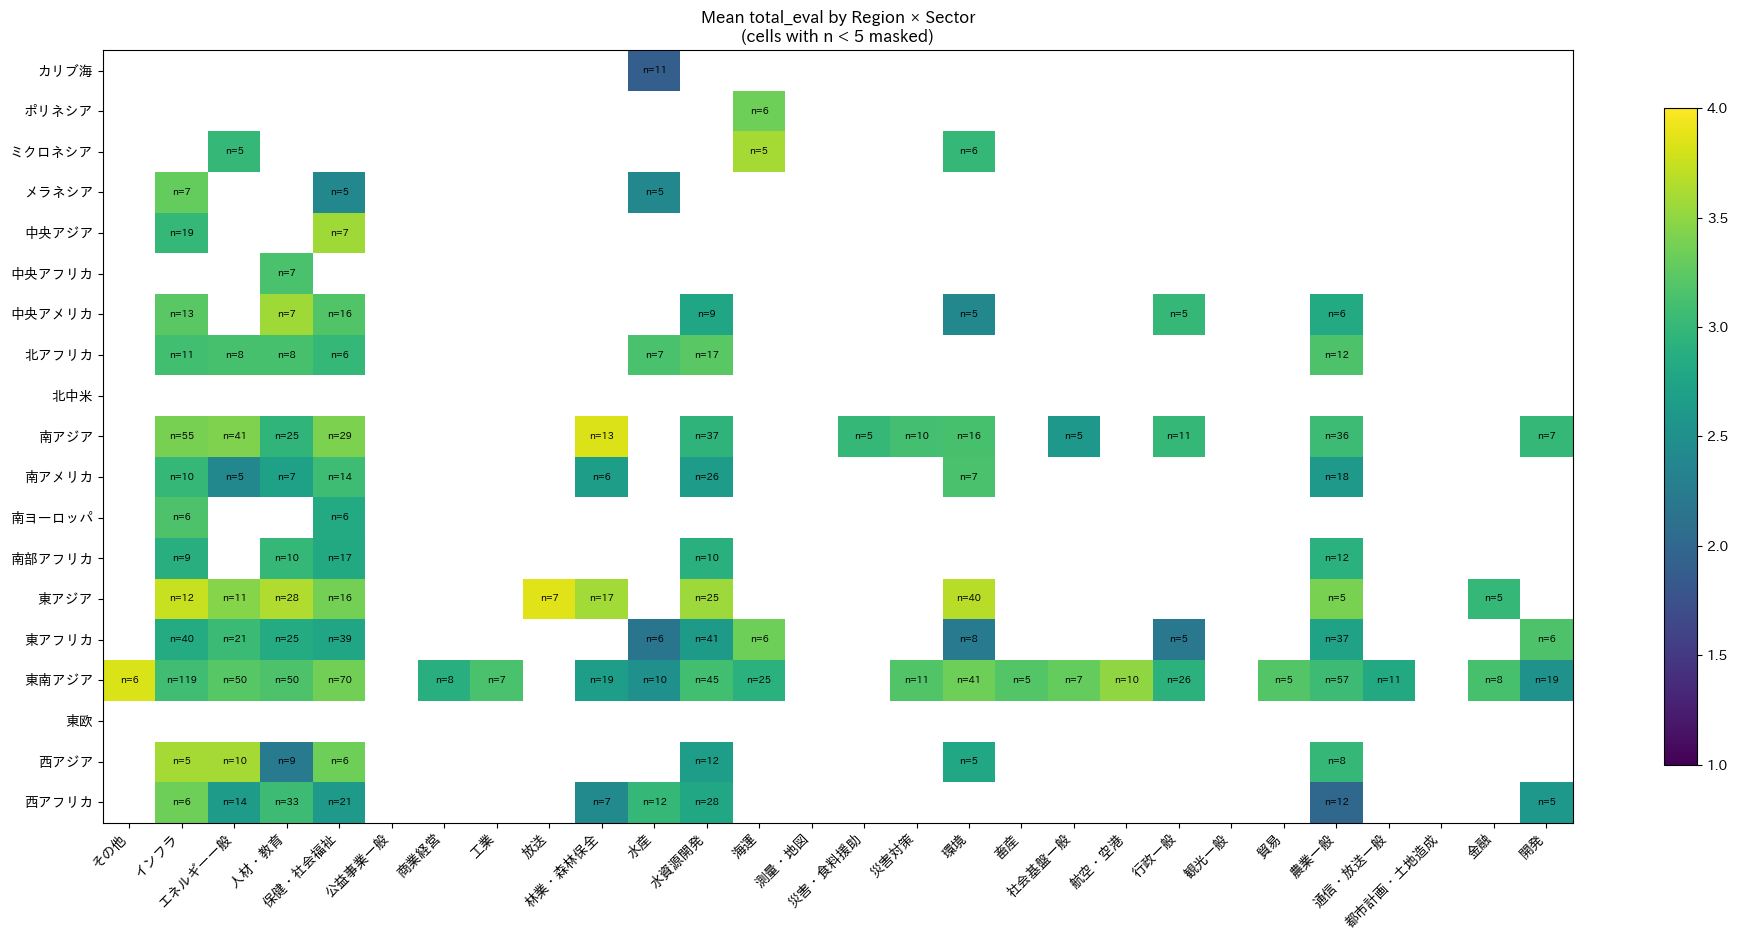

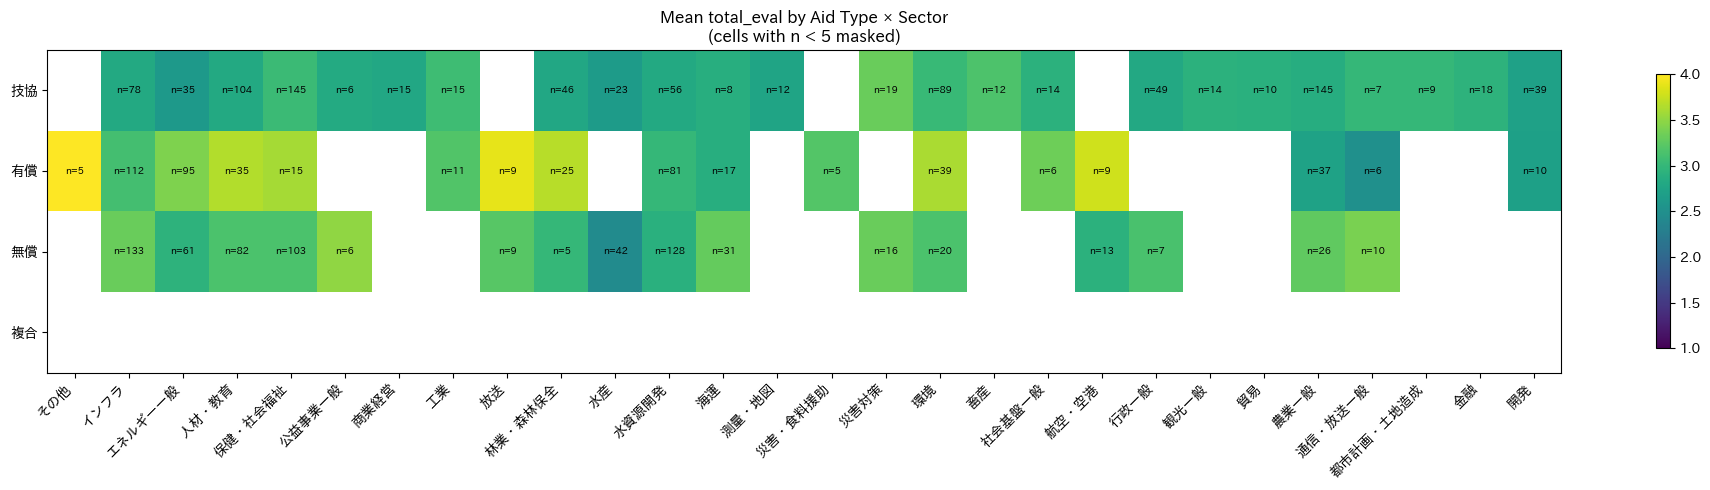

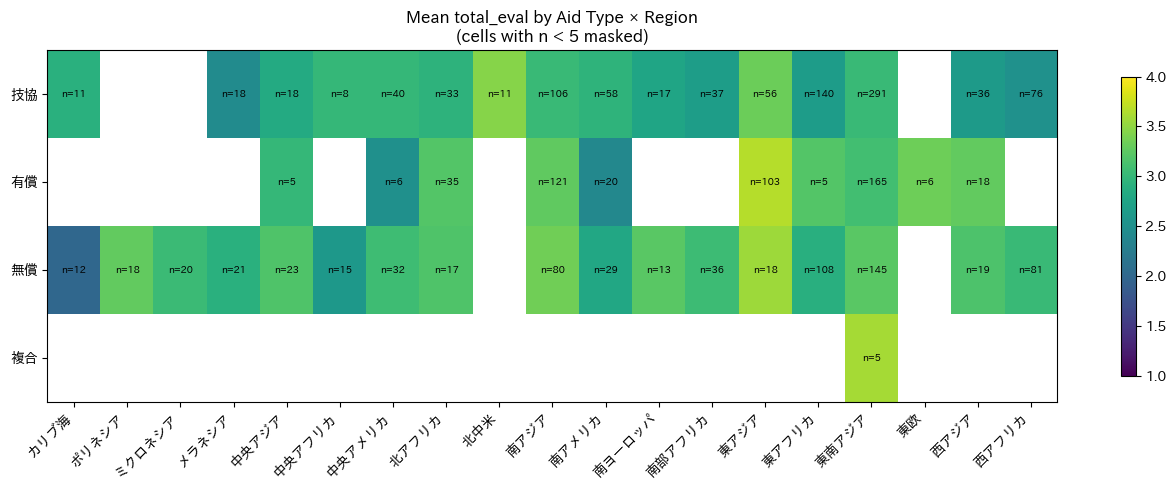

In [20]:
VMIN, VMAX = 1.0, 4.0

emm_rs  = plot_region_sector_heatmap(df, min_n=5, show_counts=True, vmin=VMIN, vmax=VMAX)
emm_as  = plot_aidtype_sector_heatmap(df, min_n=5, show_counts=True, vmin=VMIN, vmax=VMAX)
emm_ar  = plot_aidtype_region_heatmap(df, min_n=5, show_counts=True, vmin=VMIN, vmax=VMAX)

## 有償が有意にマイナスな原因を追求

,variable,SMD,|SMD|
0,分野:海運・船舶,0.003563,0.003563
1,分野:通信・放送一般,0.005044,0.005044
2,project_start_year:2008,0.007073,0.007073
3,project_start_year:2017,-0.010778,0.010778
4,project_start_year:2006,-0.011849,0.011849
...,...,...,...
160,分野:運輸交通一般、港湾,NaN,NaN
161,分野:海運・船舶、都市交通,NaN,NaN
162,分野:運輸交通一般、道路,NaN,NaN
163,分野:行政一般、建築住宅,NaN,NaN


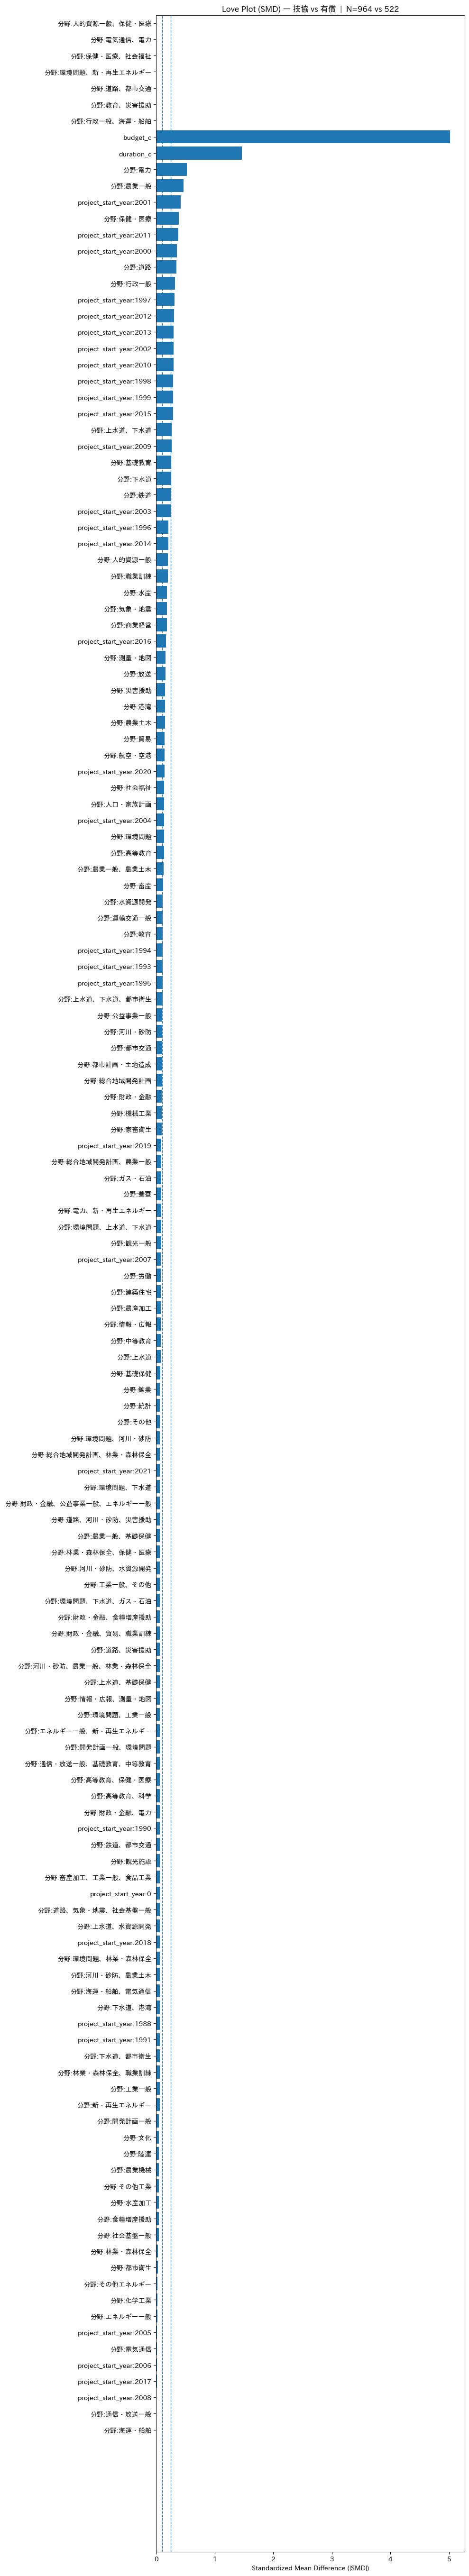

In [21]:
from math import sqrt

df["type"] = df["type"].astype(str)

# 予算: log1p → 中心化（budget_c）
df["ln_budget"] = np.log1p(df["project_cost_plan"])
df["budget_c"] = df["ln_budget"] - df["ln_budget"].mean(skipna=True)

# 期間: 中心化（duration_c）
df["duration_c"] = df["project_duration_act"] - df["project_duration_act"].mean(skipna=True)

# 分類変数（分野・開始年）
df["project_start_year"] = df["project_start_year"].astype(str)

# 必須列の欠損は除外
req_cols = ["type", "budget_c", "duration_c", "分野", "project_start_year"]
df = df.dropna(subset=req_cols)

# ----------------------------
# 2) SMD ヘルパー
# ----------------------------
def smd_numeric(x_t, x_c):
    m_t, m_c = np.nanmean(x_t), np.nanmean(x_c)
    v_t, v_c = np.nanvar(x_t, ddof=1), np.nanvar(x_c, ddof=1)
    pooled = (v_t + v_c) / 2.0
    if pooled <= 0 or np.isnan(pooled):
        return np.nan
    return (m_t - m_c) / sqrt(pooled)

def smd_binary(p_t, p_c):
    pooled = (p_t * (1 - p_t) + p_c * (1 - p_c)) / 2.0
    if pooled <= 0 or np.isnan(pooled):
        return np.nan
    return (p_t - p_c) / sqrt(pooled)

def smd_categorical(series, mask_t, mask_c):
    # 各水準を 1/0 に展開してSMD（差の標準化）を計算
    levels = series.dropna().unique().tolist()
    out = {}
    for lev in levels:
        ind = (series == lev).astype(float)
        p_t = ind[mask_t].mean() if mask_t.any() else np.nan
        p_c = ind[mask_c].mean() if mask_c.any() else np.nan
        out[f"{series.name}:{lev}"] = smd_binary(p_t, p_c)
    return out

def compute_smd_table(df, treat_a, treat_b, covar_num, covar_cat):
    m_a = df["type"] == treat_a
    m_b = df["type"] == treat_b
    n_a, n_b = int(m_a.sum()), int(m_b.sum())
    if n_a == 0 or n_b == 0:
        raise ValueError(f"{treat_a} または {treat_b} のサンプルが不足しています。 N_a={n_a}, N_b={n_b}")

    smds = {}
    # 数値
    for v in covar_num:
        smds[v] = smd_numeric(df.loc[m_a, v], df.loc[m_b, v])
    # カテゴリ（分野・開始年は水準ごと）
    for v in covar_cat:
        smds.update(smd_categorical(df[v], m_a, m_b))

    tab = pd.DataFrame({"variable": list(smds.keys()), "SMD": list(smds.values())})
    tab["|SMD|"] = tab["SMD"].abs()
    tab = tab.sort_values("|SMD|", ascending=True).reset_index(drop=True)
    meta = {"n_treat": n_a, "n_comp": n_b}
    return tab, meta

def show_loveplot(tab, title, base_width=10, row_height=0.33):
    h = max(4, row_height * len(tab))
    plt.figure(figsize=(base_width, h))
    plt.barh(tab["variable"], tab["|SMD|"])
    plt.axvline(0.10, linestyle="--", linewidth=1)
    plt.axvline(0.25, linestyle="--", linewidth=1)
    plt.xlabel("Standardized Mean Difference (|SMD|)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ===== 3) Run & display (Notebook) =====
covar_num = ["budget_c", "duration_c"]
covar_cat = ["分野", "project_start_year"]
pairs = [("技協", "有償")]

for a, b in pairs:
    tab, meta = compute_smd_table(df, a, b, covar_num, covar_cat)
    display(tab)  # Notebook表示（保存しない）
    show_loveplot(tab, f"Love Plot (SMD) — {a} vs {b}  |  N={meta['n_treat']} vs {meta['n_comp']}")


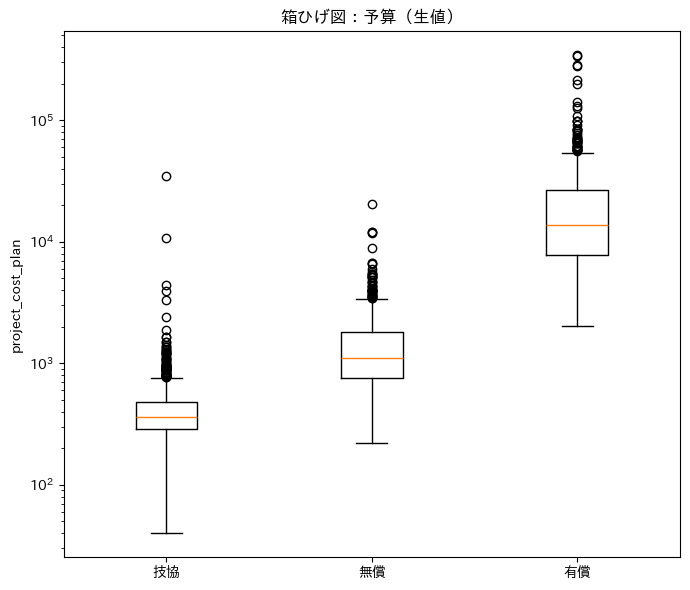

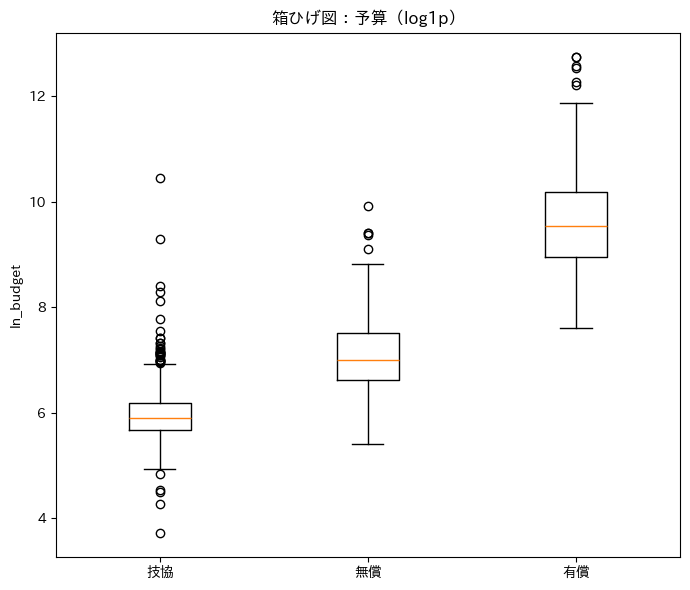

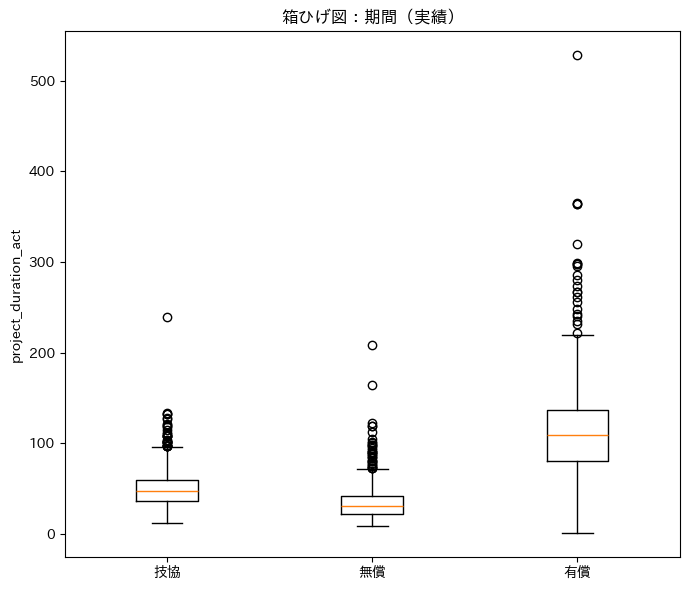

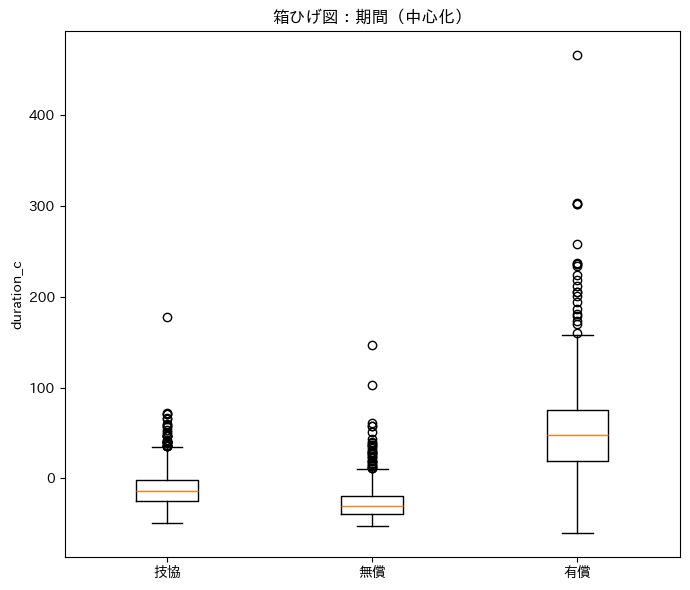

In [22]:
def _group_arrays(frame: pd.DataFrame, series_name: str, order: list[str]) -> list[np.ndarray]:
    """指定列をスキーム順に配列化（欠損除去）"""
    s = frame[["type", series_name]].dropna()
    return [s.loc[s["type"] == g, series_name].to_numpy() for g in order]

def show_boxplot(frame: pd.DataFrame,
                 series_name: str,
                 title: str | None = None,
                 order: list[str] = None,
                 ylog: bool = False,
                 showfliers: bool = True,
                 figsize: tuple[float, float] = (7, 6)):
    """
    3群箱ひげ図をノートブックに表示（保存しない）
      - series_name: 数値列名
      - order: グループ表示順（デフォルトは present）
      - ylog: y軸を対数スケールにするか
      - showfliers: 外れ値の点を表示するか
    """
    if order is None:
        order = present
    data = _group_arrays(frame, series_name, order)

    plt.figure(figsize=figsize)  # 単一図（サブプロットなし）
    plt.boxplot(data, tick_labels=order, showfliers=showfliers)
    if ylog:
        plt.yscale("log")
    plt.title(title or f"箱ひげ図：{series_name}")
    plt.ylabel(series_name)
    plt.tight_layout()
    plt.show()

# ===== 3) 呼び出し例（必要なものだけ実行） =====
ORDER = ["技協", "無償", "有償"]
present = [g for g in ORDER if g in set(df["type"])]

# 1) 予算（生値）：スケールの歪みが大きい場合は ylog=True 推奨
show_boxplot(df, "project_cost_plan", "箱ひげ図：予算（生値）", order=present, ylog=True)

# 2) 予算（log1p）
show_boxplot(df, "ln_budget", "箱ひげ図：予算（log1p）", order=present, ylog=False)

# 3) 期間（実績）
show_boxplot(df, "project_duration_act", "箱ひげ図：期間（実績）", order=present, ylog=False)

# 4) 期間（中心化）
show_boxplot(df, "duration_c", "箱ひげ図：期間（中心化）", order=present, ylog=False)

# ---- 任意の数値列に対しても同様に ----
#show_boxplot(df, "<任意の数値列名>", f"箱ひげ図：<任意の数値列名>", order=present, ylog=False)